<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.971104,-0.000171,103.970933,103.971019,-0.000087
1,0.0,1.0,96.857249,-0.000208,106.857042,106.857152,-0.000111
2,0.0,2.0,93.634288,-0.000064,103.634224,103.634204,0.000019
3,0.0,3.0,75.493402,-0.000115,85.493287,85.493397,-0.000110
4,0.0,4.0,67.469678,-0.000273,77.469405,77.469707,-0.000303
...,...,...,...,...,...,...,...
249995,999.0,245.0,20.193068,-0.001737,30.191331,30.193036,-0.001705
249996,999.0,246.0,88.104427,0.000216,98.104643,98.104463,0.000179
249997,999.0,247.0,81.725223,-0.000025,91.725198,91.725253,-0.000055
249998,999.0,248.0,94.183384,0.000095,104.183480,104.183427,0.000052


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.971104,-0.000171,103.970933,103.971019,-0.000087
1,0.0,1.0,96.857249,-0.000208,106.857042,106.857152,-0.000111
2,0.0,2.0,93.634288,-0.000064,103.634224,103.634204,0.000019
3,0.0,3.0,75.493402,-0.000115,85.493287,85.493397,-0.000110
4,0.0,4.0,67.469678,-0.000273,77.469405,77.469707,-0.000303
...,...,...,...,...,...,...,...
249995,999.0,245.0,20.193068,-0.001737,30.191331,30.193036,-0.001705
249996,999.0,246.0,88.104427,0.000216,98.104643,98.104463,0.000179
249997,999.0,247.0,81.725223,-0.000025,91.725198,91.725253,-0.000055
249998,999.0,248.0,94.183384,0.000095,104.183480,104.183427,0.000052


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.971104 -0.000171  103.970933  103.971019 -0.000087
      1.0    96.857249 -0.000208  106.857042  106.857152 -0.000111
      2.0    93.634288 -0.000064  103.634224  103.634204  0.000019
      3.0    75.493402 -0.000115   85.493287   85.493397 -0.000110
      4.0    67.469678 -0.000273   77.469405   77.469707 -0.000303
...                ...       ...         ...         ...       ...
999.0 245.0  20.193068 -0.001737   30.191331   30.193036 -0.001705
      246.0  88.104427  0.000216   98.104643   98.104463  0.000179
      247.0  81.725223 -0.000025   91.725198   91.725253 -0.000055
      248.0  94.183384  0.000095  104.183480  104.183427  0.000052
      249.0  50.688624  0.000100   60.688724   60.688623  0.000101

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.971104 -0.000171  103.970933  103.971019 -0.000087
      1.0    96.857249 -0.000208  106.857042  106.857152 -0.000111
      2.0    93.634288 -0.000064  103.634224  103.634204  0.000019
      3.0    75.493402 -0.000115   85.493287   85.493397 -0.000110
      4.0    67.469678 -0.000273   77.469405   77.469707 -0.000303
...                ...       ...         ...         ...       ...
999.0 245.0  20.193068 -0.001737   30.191331   30.193036 -0.001705
      246.0  88.104427  0.000216   98.104643   98.104463  0.000179
      247.0  81.725223 -0.000025   91.725198   91.725253 -0.000055
      248.0  94.183384  0.000095  104.183480  104.183427  0.000052
      249.0  50.688624  0.000100   60.688724   60.688623  0.000101

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.971104,-0.000171,103.970933,103.971019,-0.000087
1,0.0,1.0,96.857249,-0.000208,106.857042,106.857152,-0.000111
2,0.0,2.0,93.634288,-0.000064,103.634224,103.634204,0.000019
3,0.0,3.0,75.493402,-0.000115,85.493287,85.493397,-0.000110
4,0.0,4.0,67.469678,-0.000273,77.469405,77.469707,-0.000303
...,...,...,...,...,...,...,...
249995,999.0,245.0,20.193068,-0.001737,30.191331,30.193036,-0.001705
249996,999.0,246.0,88.104427,0.000216,98.104643,98.104463,0.000179
249997,999.0,247.0,81.725223,-0.000025,91.725198,91.725253,-0.000055
249998,999.0,248.0,94.183384,0.000095,104.183480,104.183427,0.000052


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.971104 -0.000171  103.970933  103.971019 -0.000087
      1.0    96.857249 -0.000208  106.857042  106.857152 -0.000111
      2.0    93.634288 -0.000064  103.634224  103.634204  0.000019
      3.0    75.493402 -0.000115   85.493287   85.493397 -0.000110
      4.0    67.469678 -0.000273   77.469405   77.469707 -0.000303
...                ...       ...         ...         ...       ...
999.0 245.0  20.193068 -0.001737   30.191331   30.193036 -0.001705
      246.0  88.104427  0.000216   98.104643   98.104463  0.000179
      247.0  81.725223 -0.000025   91.725198   91.725253 -0.000055
      248.0  94.183384  0.000095  104.183480  104.183427  0.000052
      249.0  50.688624  0.000100   60.688724   60.688623  0.000101

[250000 rows x 5 columns]

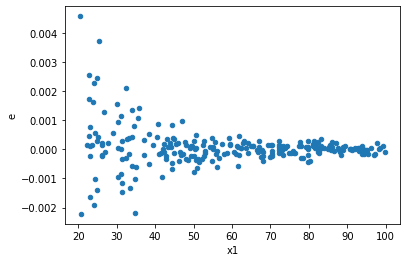

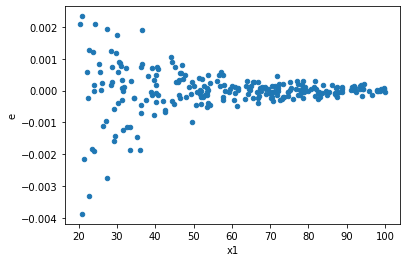

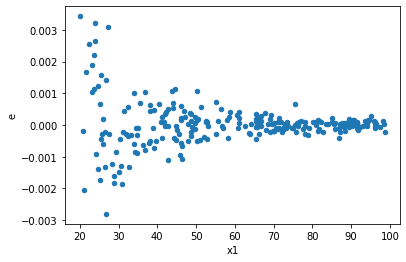

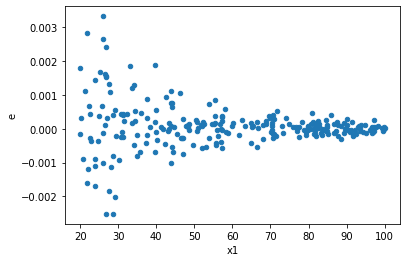

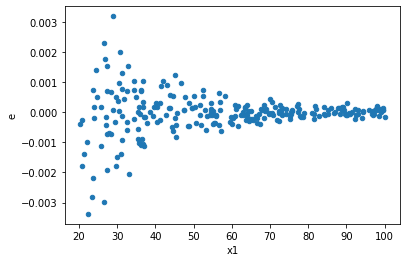

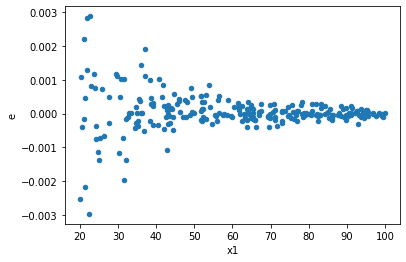

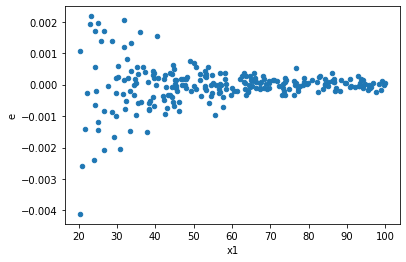

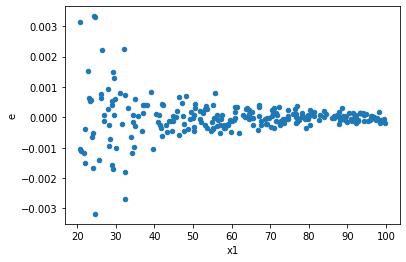

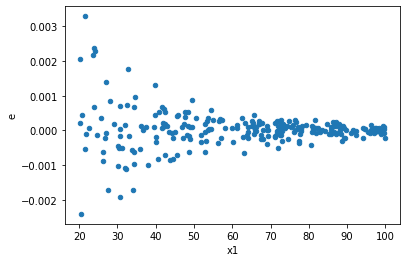

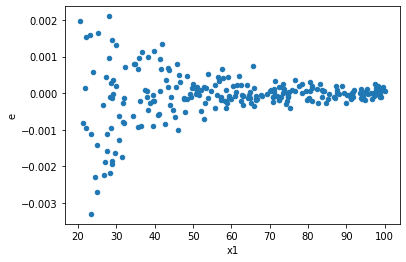

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.00010511075650147137,2.311568379327629e-06,1.0617248131461755e-06,2.3349175548763932e-08,0.02199173953519468,5.3735814095921935e-55,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,0.00011292376568832602,2.054031070626912e-06,1.140644097861879e-06,2.0747788592191028e-08,0.018189537499981336,6.4063399122588825e-59,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,0.00011943607811156547,2.1827751304428494e-06,1.2064250314299542e-06,2.2048233640836863e-08,0.018275676537234546,8.028056154566726e-59,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,0.00010752958565350847,2.557163312276494e-06,1.08615743084352e-06,2.5829932447237316e-08,0.023781020792885937,2.178392085431264e-53,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,0.00010907263380787365,2.226628981329936e-06,1.1017437758371075e-06,2.2491201831615512e-08,0.02041418551652506,1.5672156807944957e-56,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,8.030317814181126e-05,1.992756344387591e-06,8.111432135536491e-07,2.0128851963511022e-08,0.02481541067862204,1.6251744470587359e-52,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,0.00010146871251118642,2.45386825576716e-06,1.024936490011984e-06,2.4786548038052122e-08,0.024183496518659715,4.81243330840013e-53,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,0.00010345855348548527,2.134453852425304e-06,1.0450358937927805e-06,2.156013992348792e-08,0.020631004209088984,2.590000363808947e-56,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,7.348996193730601e-05,2.0055890308630628e-06,7.42322847851576e-07,2.0258475059222857e-08,0.027290652736682904,1.42317975686159e-50,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64